In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster.elbow import kelbow_visualizer
%matplotlib inline

In [2]:
webpage_name = "booking"
divs_data_original = pd.read_csv('./dataframes/df_' + webpage_name + '.csv', index_col=0)

In [3]:
divs_data_original

,xpath,reduced_xpath,dom_tree_level,x_position,y_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left,is_search_result
0,/html/body/div[7],/html/body/div[],3,120,166,7213.100098,1110.000000,5429,2,0,0,0,0,0,119.5,0.0,119.5,False
1,/html/body/div[7]/div,/html/body/div[]/div,4,120,166,7213.100098,1110.000000,5428,1,0,0,0,0,0,0.0,0.0,0.0,False
2,/html/body/div[7]/div/div[3],/html/body/div[]/div/div[],5,120,210,7169.100098,1110.000000,5366,3,0,0,0,0,0,0.0,0.0,0.0,False
3,/html/body/div[7]/div/div[3]/div[1],/html/body/div[]/div/div[]/div[],6,120,210,7169.100098,1110.000000,5362,2,0,5,0,5,16,0.0,0.0,0.0,False
4,/html/body/div[7]/div/div[3]/div[1]/div[1],/html/body/div[]/div/div[]/div[]/div[],7,410,210,7156.100098,814.000000,3187,3,0,0,0,0,0,0.0,13.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,/html/body/div[9]/div[3]/div[2]/div/div/div[6],/html/body/div[]/div[]/div[]/div/div/div[],8,1003,7775,388.000000,218.800003,311,1,0,10,0,0,0,0.0,0.0,0.0,False
420,/html/body/div[9]/div[3]/div[4],/html/body/div[]/div[]/div[],5,120,8248,107.049988,1110.000000,7,3,0,8,0,8,0,119.5,0.0,119.5,False
421,/html/body/div[9]/div[3]/div[5],/html/body/div[]/div[]/div[],5,120,8355,90.000000,1110.000000,16,1,0,8,0,8,0,119.5,0.0,119.5,False
422,/html/body/div[9]/div[3]/div[5]/div,/html/body/div[]/div[]/div[]/div,6,128,8355,90.000000,1094.000000,15,1,0,0,0,0,0,0.0,0.0,0.0,False


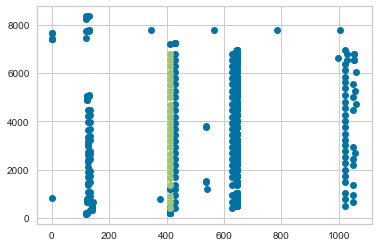

In [4]:
# Gráfica con la posición de cada uno de los elementos donde aquellos
# que son resultados de búsqueda se muestran con un color distinto
groups = divs_data_original.groupby("is_search_result")
for name, group in groups:
    plt.plot(group["x_position"], group["y_position"], marker="o", linestyle="", label=name)

In [5]:
# Agrupamos los datos según si son resultados de búsqueda o no, para ver un resumen de sus características
divs_data_original.groupby(divs_data_original['is_search_result'], as_index=False).mean().sort_values(by='width', ascending=False)

,is_search_result,dom_tree_level,x_position,y_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left
1,True,12.000000,410.00000,3667.960000,244.300000,814.000000,117.72000,6.000000,16.000000,16.00000,16.000000,16.000000,16.000000,0.00000,16.000000,0.000000
0,False,14.847118,564.45614,3634.531328,357.336425,453.669173,155.45614,1.819549,0.619048,2.58396,1.037594,1.912281,0.729323,1.27193,0.271779,0.550125


In [6]:
# Comprobamos cuántos resultados de búsqueda hay en el dataframe original, antes de eliminar ninguna fila
total_items = len(divs_data_original[divs_data_original['is_search_result'] == 1])
print("Resultados de búsqueda en el dataframe original: " + str(total_items))

Resultados de búsqueda en el dataframe original: 25


In [7]:
divs_data = divs_data_original

# Subdividir cada conjunto con el mismo "reduced_xpath" según el número de "html_attributes"
# y eliminar las subdivisiones que tengan menos de 8 elementos
for x in set(divs_data['reduced_xpath']):
    print('----------- REDUCED XPATH ' + str(x) + ' -----------')
    df = divs_data[divs_data['reduced_xpath'] == x]
    for y in set(df['html_attributes']):
        df2 = df[df['html_attributes'] == y]
        index = df2.index
        number_of_rows = len(index)
        print('----------- ' + str(y) + ' HTML ATTRIBUTES: ' + str(number_of_rows) + ' ELEMENTO/S -----------')
        print(df2)
        
        if number_of_rows < 8:
            divs_data = divs_data.drop(df2.index)

----------- REDUCED XPATH /html/body/div[]/div[]/form/div -----------
----------- 1 HTML ATTRIBUTES: 1 ELEMENTO/S -----------
                                 xpath                    reduced_xpath  \
408  /html/body/div[9]/div[1]/form/div  /html/body/div[]/div[]/form/div   

     dom_tree_level  x_position  y_position      height   width  \
408               6           0        7406  249.599991  1349.0   

     html_children  html_attributes  padding_top  padding_right  \
408             24                1           50              0   

     padding_bottom  padding_left  margin_top  margin_right  margin_bottom  \
408              50             0           0           0.0            0.0   

     margin_left  is_search_result  
408          0.0             False  
----------- REDUCED XPATH /html/body/div[]/div/div[]/div[]/div[]/div[]/div[]/div[]/div/div[]/div[]/div[]/div[] -----------
----------- 1 HTML ATTRIBUTES: 30 ELEMENTO/S -----------
                                          

411             False  
----------- 3 HTML ATTRIBUTES: 1 ELEMENTO/S -----------
                               xpath                 reduced_xpath  \
420  /html/body/div[9]/div[3]/div[4]  /html/body/div[]/div[]/div[]   

     dom_tree_level  x_position  y_position      height   width  \
420               5         120        8248  107.049988  1110.0   

     html_children  html_attributes  padding_top  padding_right  \
420              7                3            0              8   

     padding_bottom  padding_left  margin_top  margin_right  margin_bottom  \
420               0             8           0         119.5            0.0   

     margin_left  is_search_result  
420        119.5             False  
----------- REDUCED XPATH /html/body/div[]/div/div[]/div[]/div[]/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/div -----------
----------- 1 HTML ATTRIBUTES: 2 ELEMENTO/S -----------
                                                 xpath  \
319  /html/body/div[7]/div/div[3]/div

359           0.0            0.0          0.0             False  
----------- REDUCED XPATH /html/body/div[]/div/div[]/div[]/div[]/div[]/div[]/div[]/div/div[]/div[]/div[]/div[]/div[] -----------
----------- 1 HTML ATTRIBUTES: 2 ELEMENTO/S -----------
                                                 xpath  \
62   /html/body/div[7]/div/div[3]/div[1]/div[1]/div...   
175  /html/body/div[7]/div/div[3]/div[1]/div[1]/div...   

                                         reduced_xpath  dom_tree_level  \
62   /html/body/div[]/div/div[]/div[]/div[]/div[]/d...              16   
175  /html/body/div[]/div/div[]/div[]/div[]/div[]/d...              16   

     x_position  y_position  height  width  html_children  html_attributes  \
62          537        1499   112.0  320.0              1                1   
175         537        3786   112.0  320.0              1                1   

     padding_top  padding_right  padding_bottom  padding_left  margin_top  \
62             0              0        

In [8]:
divs_data

,xpath,reduced_xpath,dom_tree_level,x_position,y_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left,is_search_result
13,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,12,410,403,234.000000,814.0,125,6,16,16,16,16,16,0.0,16.0,0.0,True
14,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,13,428,420,200.000000,200.0,35,2,0,0,0,0,0,0.0,0.0,0.0,False
15,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,13,628,420,200.000000,580.0,88,1,0,0,0,16,0,0.0,0.0,0.0,False
16,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,14,644,478,115.000000,564.0,43,1,0,0,0,0,8,0.0,0.0,0.0,False
17,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,15,644,474,123.000000,564.0,42,1,0,0,0,0,0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,/html/body/div[7]/div/div[3]/div[1]/div[2]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,15,134,3992,215.600006,246.0,42,2,0,0,0,0,0,0.0,0.0,0.0,False
395,/html/body/div[7]/div/div[3]/div[1]/div[2]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,14,126,4224,221.800003,262.0,39,4,0,8,8,8,8,0.0,8.0,0.0,False
396,/html/body/div[7]/div/div[3]/div[1]/div[2]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,15,134,4252,184.800003,246.0,36,2,0,0,0,0,0,0.0,0.0,0.0,False
397,/html/body/div[7]/div/div[3]/div[1]/div[2]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,14,126,4454,407.399994,262.0,63,4,0,8,8,8,8,0.0,8.0,0.0,False


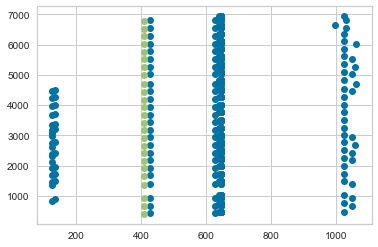

In [9]:
# Gráfica con la posición de cada uno de los elementos donde aquellos
# que son resultados de búsqueda se muestran con un color distinto
groups = divs_data.groupby("is_search_result")
for name, group in groups:
    plt.plot(group["x_position"], group["y_position"], marker="o", linestyle="", label=name)

In [10]:
# Comprobamos cuántos resultados de búsqueda hay en el dataframe, tras eliminar conjuntos de menos de 8 elementos
print("Resultados de búsqueda tras eliminar conjuntos de menos de 8 elementos: " 
      + str(len(divs_data[divs_data['is_search_result'] == 1])))

Resultados de búsqueda tras eliminar conjuntos de menos de 8 elementos: 25


In [11]:
# Eliminamos los campos que no son númericos (xpath, reduced_xpath), la clasificación correcta (is_search_result)
# y la "posición y" (y_position) ya que varía mucho entre resultados de búsqueda al ser un listado vertical. 
divs_data_r = divs_data.drop(['xpath', 'reduced_xpath', 'is_search_result', 'y_position'], axis=1)
scaler = MinMaxScaler()
# Estandarización de todos los valores numéricos
divs_data_r[['dom_tree_level', 'x_position', 'height', 'width', 'html_children', 'html_attributes', 'padding_top', 
             'padding_right', 'padding_bottom', 'padding_left', 'margin_top', 'margin_right', 'margin_bottom', 
             'margin_left']] = scaler.fit_transform(divs_data_r[['dom_tree_level', 'x_position', 'height', 'width', 
                                                                 'html_children', 'html_attributes', 'padding_top', 
                                                                 'padding_right', 'padding_bottom', 'padding_left', 
                                                                 'margin_top', 'margin_right', 'margin_bottom', 
                                                                 'margin_left']])
divs_data_r

,dom_tree_level,x_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left
13,0.000,0.303743,0.478339,1.000000,0.943548,1.000000,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0
14,0.125,0.322995,0.376053,0.080402,0.217742,0.333333,0.0,0.000000,0.0,0.0,0.2,1.0,0.2,1.0
15,0.125,0.536898,0.376053,0.649534,0.645161,0.166667,0.0,0.000000,0.0,1.0,0.2,1.0,0.2,1.0
16,0.250,0.554011,0.120337,0.625571,0.282258,0.166667,0.0,0.000000,0.0,0.0,0.6,1.0,0.2,1.0
17,0.375,0.554011,0.144404,0.625571,0.274194,0.166667,0.0,0.000000,0.0,0.0,0.2,1.0,0.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.375,0.008556,0.422984,0.149297,0.274194,0.333333,0.0,0.000000,0.0,0.0,0.2,1.0,0.2,1.0
395,0.250,0.000000,0.441637,0.173261,0.250000,0.666667,0.0,0.333333,0.5,0.5,0.6,1.0,0.6,1.0
396,0.375,0.008556,0.330325,0.149297,0.225806,0.333333,0.0,0.000000,0.0,0.0,0.2,1.0,0.2,1.0
397,0.250,0.000000,1.000000,0.173261,0.443548,0.666667,0.0,0.333333,0.5,0.5,0.6,1.0,0.6,1.0


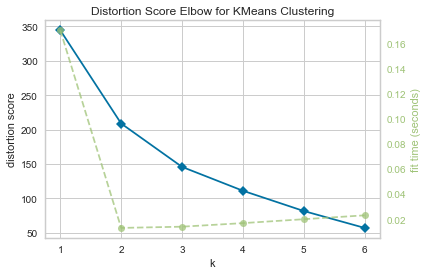

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, locate_elbow=False, model=None)

In [12]:
# Gráfica del elbow method para determinar el número de clusters en kmeans
kelbow_visualizer(KMeans(random_state=4), divs_data_r, k=(1,7), locate_elbow=False)

In [13]:
# Calculamos automáticamente el codo de la gráfica
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(divs_data_r)
    Sum_of_squared_distances.append(km.inertia_)
    
kn = KneeLocator(K, Sum_of_squared_distances, curve='convex', direction='decreasing')

In [14]:
# Ejecución del algoritmo kmeans con el k anteriormente calculado
model = KMeans(n_clusters=kn.knee)
model.fit(divs_data_r)
yhat = model.predict(divs_data_r)

# Añadimos al dataframe "y_position" estandarizada para poder representar los puntos
divs_data_r['y_position'] = divs_data['y_position']
scaler = MinMaxScaler()
divs_data_r[['y_position']] = scaler.fit_transform(divs_data_r[['y_position']])
# Añadimos una nueva columna "cluster" que indique a qué cluster ha sido asignado cada elemento
divs_data_r['cluster'] = yhat

In [15]:
divs_data_r

,dom_tree_level,x_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left,y_position,cluster
13,0.000,0.303743,0.478339,1.000000,0.943548,1.000000,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,3
14,0.125,0.322995,0.376053,0.080402,0.217742,0.333333,0.0,0.000000,0.0,0.0,0.2,1.0,0.2,1.0,0.002602,1
15,0.125,0.536898,0.376053,0.649534,0.645161,0.166667,0.0,0.000000,0.0,1.0,0.2,1.0,0.2,1.0,0.002602,0
16,0.250,0.554011,0.120337,0.625571,0.282258,0.166667,0.0,0.000000,0.0,0.0,0.6,1.0,0.2,1.0,0.011480,1
17,0.375,0.554011,0.144404,0.625571,0.274194,0.166667,0.0,0.000000,0.0,0.0,0.2,1.0,0.2,1.0,0.010868,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.375,0.008556,0.422984,0.149297,0.274194,0.333333,0.0,0.000000,0.0,0.0,0.2,1.0,0.2,1.0,0.549365,1
395,0.250,0.000000,0.441637,0.173261,0.250000,0.666667,0.0,0.333333,0.5,0.5,0.6,1.0,0.6,1.0,0.584877,1
396,0.375,0.008556,0.330325,0.149297,0.225806,0.333333,0.0,0.000000,0.0,0.0,0.2,1.0,0.2,1.0,0.589163,1
397,0.250,0.000000,1.000000,0.173261,0.443548,0.666667,0.0,0.333333,0.5,0.5,0.6,1.0,0.6,1.0,0.620083,0


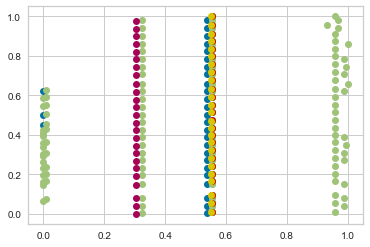

In [16]:
# Gráfica con la posición de cada uno de los elementos coloreados
# según el cluster al que pertenecen
groups = divs_data_r.groupby("cluster")
for name, group in groups:
    plt.plot(group["x_position"], group["y_position"], marker="o", linestyle="", label=name)

In [17]:
# Recuperamos las columnas "xpath" y "reduced_path" para continuar con el filtrado
divs_data_r['xpath'] = divs_data['xpath']
divs_data_r['reduced_xpath'] = divs_data['reduced_xpath']
# Recuperamos la columna "is_search_result" para comprobar los resultados
divs_data_r['is_search_result'] = divs_data['is_search_result']
# Datos agrupados según su cluster, donde podemos ver un resumen de sus características
divs_data_r.groupby(divs_data_r['cluster'], as_index=False).mean().sort_values(by='width', ascending=False)

,cluster,dom_tree_level,x_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left,y_position,is_search_result
3,3,0.000000,0.303743,0.509326,1.000000,0.884839,1.000000,1.00,0.666667,1.000000,1.000000,1.000000,1.0,1.000000,1.0,0.499764,True
4,4,0.750000,0.549733,0.157160,0.637553,0.266774,0.833333,0.25,0.166667,0.250000,0.250000,0.000000,0.0,0.000000,0.0,0.514263,False
0,0,0.138393,0.479374,0.430140,0.598505,0.692684,0.220238,0.00,0.035714,0.053571,0.946429,0.242857,1.0,0.242857,1.0,0.504652,False
1,1,0.473684,0.537557,0.165490,0.379351,0.200601,0.255735,0.00,0.020243,0.030364,0.030364,0.264777,1.0,0.224291,1.0,0.496439,False
2,2,0.875000,0.554011,0.133093,0.346876,0.096774,0.166667,0.00,1.000000,0.000000,0.000000,0.200000,1.0,0.200000,1.0,0.514875,False


In [18]:
# Guarda los números de aquellos clusters con std = 0 en la columna 
# "y_position" (es decir, misma y), para posteriormente eliminarlos
delete = []

# Para aquellos clusters que contengan más de un "reduced_xpath"
# distinto, nos quedamos únicamente con el más corto.
for x in set(divs_data_r['cluster']):
    print('----------- CLUSTER ' + str(x) + ' -----------')
    df = divs_data_r[divs_data_r['cluster'] == x]
    xpath = len(set(df['reduced_xpath']))
    
    if (xpath > 1):
        df_drop = df[df['reduced_xpath'] != min(list(df['reduced_xpath']), key=len)]
        df = df.drop(df_drop.index)
        divs_data_r = divs_data_r.drop(df_drop.index)
        
    print(df['reduced_xpath'].value_counts())
    
    std = df.std(axis = 0, skipna = True)
    print("std['y_position'] == " + str(std['y_position']))
    
    if (std['y_position'] == 0):
        delete.append(x)

----------- CLUSTER 0 -----------
/html/body/div[]/div/div[]/div[]/div[]/div[]/div[]/div[]/div/div[]/div[]    25
Name: reduced_xpath, dtype: int64
std['y_position'] == 0.296177913093287
----------- CLUSTER 1 -----------
/html/body/div[]/div/div[]/div[]/div[]/div[]/div[]/div[]/div/div[]/div[]    25
Name: reduced_xpath, dtype: int64
std['y_position'] == 0.296177913093287
----------- CLUSTER 2 -----------
/html/body/div[]/div/div[]/div[]/div[]/div[]/div[]/div[]/div/div[]/div[]/div[]/div/div/div/div/div[]    25
Name: reduced_xpath, dtype: int64
std['y_position'] == 0.2965152537863898
----------- CLUSTER 3 -----------
/html/body/div[]/div/div[]/div[]/div[]/div[]/div[]/div[]/div/div[]    25
Name: reduced_xpath, dtype: int64
std['y_position'] == 0.29617791309328706
----------- CLUSTER 4 -----------
/html/body/div[]/div/div[]/div[]/div[]/div[]/div[]/div[]/div/div[]/div[]/div[]/div/div/div/div    25
Name: reduced_xpath, dtype: int64
std['y_position'] == 0.2965152537863898


In [19]:
print("Clusters a eliminar con std['y_position'] == 0: " + str(delete))
# Eliminamos clusters cuyos elementos tengan la misma "y"
for i in delete:
    divs_data_r = divs_data_r[divs_data_r.cluster != i] 

Clusters a eliminar con std['y_position'] == 0: []


In [20]:
# Comprobamos cuántos resultados de búsqueda hay en el dataframe, tras eliminar conjuntos cuyo xpath 
# no es el más corto del cluster
print("Resultados de búsqueda tras eliminar conjuntos cuyo xpath no es el más corto del cluster: " 
      + str(len(divs_data_r[divs_data_r['is_search_result'] == 1])))

Resultados de búsqueda tras eliminar conjuntos cuyo xpath no es el más corto del cluster: 25


In [21]:
divs_data_r

,dom_tree_level,x_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left,y_position,cluster,xpath,reduced_xpath,is_search_result
13,0.000,0.303743,0.478339,1.000000,0.943548,1.000000,1.00,0.666667,1.00,1.00,1.0,1.0,1.0,1.0,0.000000,3,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,True
14,0.125,0.322995,0.376053,0.080402,0.217742,0.333333,0.00,0.000000,0.00,0.00,0.2,1.0,0.2,1.0,0.002602,1,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,False
15,0.125,0.536898,0.376053,0.649534,0.645161,0.166667,0.00,0.000000,0.00,1.00,0.2,1.0,0.2,1.0,0.002602,0,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,False
20,0.750,0.549733,0.144404,0.637553,0.250000,0.833333,0.25,0.166667,0.25,0.25,0.0,0.0,0.0,0.0,0.010868,4,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,False
21,0.875,0.554011,0.120337,0.348494,0.080645,0.166667,0.00,1.000000,0.00,0.00,0.2,1.0,0.2,1.0,0.011480,2,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,0.000,0.303743,0.603189,1.000000,0.975806,1.000000,1.00,0.666667,1.00,1.00,1.0,1.0,1.0,1.0,0.978111,3,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,True
330,0.125,0.322995,0.500903,0.080402,0.096774,0.333333,0.00,0.000000,0.00,0.00,0.2,1.0,0.2,1.0,0.980713,1,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,False
331,0.125,0.536898,0.500903,0.649534,0.798387,0.166667,0.00,0.000000,0.00,1.00,0.2,1.0,0.2,1.0,0.980713,0,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,False
341,0.750,0.549733,0.144404,0.637553,0.290323,0.833333,0.25,0.166667,0.25,0.25,0.0,0.0,0.0,0.0,0.999388,4,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,False


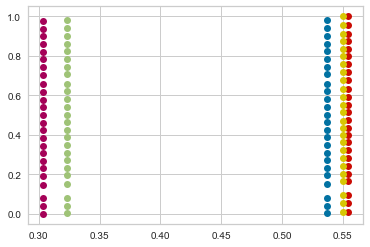

In [22]:
# Gráfica con la posición de cada uno de los elementos coloreados
# según el cluster al que pertenecen
groups = divs_data_r.groupby("cluster")
for name, group in groups:
    plt.plot(group["x_position"], group["y_position"], marker="o", linestyle="", label=name)

In [23]:
# Mostramos todos los "reduced_xpath" distintos del dataframe y su número de ocurrencias
print(divs_data_r['reduced_xpath'].value_counts())

/html/body/div[]/div/div[]/div[]/div[]/div[]/div[]/div[]/div/div[]/div[]                                50
/html/body/div[]/div/div[]/div[]/div[]/div[]/div[]/div[]/div/div[]                                      25
/html/body/div[]/div/div[]/div[]/div[]/div[]/div[]/div[]/div/div[]/div[]/div[]/div/div/div/div          25
/html/body/div[]/div/div[]/div[]/div[]/div[]/div[]/div[]/div/div[]/div[]/div[]/div/div/div/div/div[]    25
Name: reduced_xpath, dtype: int64


In [24]:
# Nos quedamos con el cluster cuyo "reduced_xpath" esté contenido en el mayor
# número de los otros "reduced_xpath", es decir "el xpath padre"
xpath_list = list(divs_data_r['reduced_xpath'])

apariciones = 0
xpath_res = ''

for x in xpath_list:
    contador = -1
    
    for y in xpath_list:
        
        if x in y:
            contador += 1
    
    if xpath_res == '' and apariciones == 0:
        xpath_res = x
        apariciones = contador
    
    elif contador > apariciones:
        xpath_res = x
        apariciones = contador

print("--------------- REDUCED_XPATH ESCOGIDO COMO SOLUCIÓN ---------------")
print(xpath_res)

--------------- REDUCED_XPATH ESCOGIDO COMO SOLUCIÓN ---------------
/html/body/div[]/div/div[]/div[]/div[]/div[]/div[]/div[]/div/div[]


In [25]:
df_res = divs_data_r[divs_data_r['reduced_xpath'] == xpath_res]
df_res

,dom_tree_level,x_position,height,width,html_children,html_attributes,padding_top,padding_right,padding_bottom,padding_left,margin_top,margin_right,margin_bottom,margin_left,y_position,cluster,xpath,reduced_xpath,is_search_result
13,0.0,0.303743,0.478339,1.0,0.943548,1.0,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,3,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,True
24,0.0,0.303743,0.529483,1.0,0.919355,1.0,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.038267,3,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,True
38,0.0,0.303743,0.529483,1.0,0.870968,1.0,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.079137,3,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,True
56,0.0,0.303743,0.624248,1.0,0.927419,1.0,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.146640,3,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,True
72,0.0,0.303743,0.478339,1.0,0.854839,1.0,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.192255,3,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,True
83,0.0,0.303743,0.478339,1.0,0.862903,1.0,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.230522,3,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,True
94,0.0,0.303743,0.478339,1.0,0.919355,1.0,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.268789,3,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,True
108,0.0,0.303743,0.478339,1.0,0.943548,1.0,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.307056,3,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,True
122,0.0,0.303743,0.506919,1.0,0.838710,1.0,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.345324,3,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,True
136,0.0,0.303743,0.478339,1.0,0.814516,1.0,1.0,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,0.385122,3,/html/body/div[7]/div/div[3]/div[1]/div[1]/div...,/html/body/div[]/div/div[]/div[]/div[]/div[]/d...,True


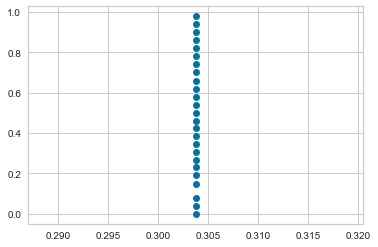

In [26]:
# Gráfica con la posición de cada uno de los elementos donde aquellos
# que no son resultados de búsqueda se muestran con un color distinto
groups = df_res.groupby("is_search_result")
for name, group in groups:
    plt.plot(group["x_position"], group["y_position"], marker="o", linestyle="", label=name)

In [27]:
# Muestra estadísticas sobre los items seleccionados, el ruido y los resultados 
# de búsqueda encontrados
precision = len(df_res[df_res['is_search_result'] == 1])/len(df_res)
recall = len(df_res[df_res['is_search_result'] == 1])/total_items
f1 = 2*((precision*recall)/(precision+recall))

print("--------------- [PRECISION] ---------------")
print(str(len(df_res[df_res['is_search_result'] == 1])) + '/' + str(len(df_res)) + " - " 
      + str("{:.2f}".format(precision)))

print("--------------- [RECALL] ---------------")
print(str(len(df_res[df_res['is_search_result'] == 1])) + '/' + str(total_items) + " - " 
      + str("{:.2f}".format(recall)))

print("--------------- [F1 SCORE] ---------------")
print(str("{:.2f}".format(f1)))

--------------- [PRECISION] ---------------
25/25 - 1.00
--------------- [RECALL] ---------------
25/25 - 1.00
--------------- [F1 SCORE] ---------------
1.00


In [28]:
# Nos quedamos con los xpaths de los elementos identificados, que podrán
# ser extraídos mediante su xpath en la aplicación que así lo necesite
df_res = df_res.drop(['dom_tree_level', 'x_position', 'height', 'width', 'html_children', 'html_attributes', 
                      'padding_top', 'padding_right', 'padding_bottom', 'padding_left', 'margin_top', 
                      'margin_right', 'margin_bottom', 'margin_left', 'y_position', 'cluster', 'reduced_xpath', 
                      'is_search_result'], axis=1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
df_res

,xpath
13,/html/body/div[7]/div/div[3]/div[1]/div[1]/div[6]/div[3]/div[1]/div/div[1]
24,/html/body/div[7]/div/div[3]/div[1]/div[1]/div[6]/div[3]/div[1]/div/div[2]
38,/html/body/div[7]/div/div[3]/div[1]/div[1]/div[6]/div[3]/div[1]/div/div[3]
56,/html/body/div[7]/div/div[3]/div[1]/div[1]/div[6]/div[3]/div[1]/div/div[5]
72,/html/body/div[7]/div/div[3]/div[1]/div[1]/div[6]/div[3]/div[1]/div/div[6]
83,/html/body/div[7]/div/div[3]/div[1]/div[1]/div[6]/div[3]/div[1]/div/div[7]
94,/html/body/div[7]/div/div[3]/div[1]/div[1]/div[6]/div[3]/div[1]/div/div[8]
108,/html/body/div[7]/div/div[3]/div[1]/div[1]/div[6]/div[3]/div[1]/div/div[9]
122,/html/body/div[7]/div/div[3]/div[1]/div[1]/div[6]/div[3]/div[1]/div/div[10]
136,/html/body/div[7]/div/div[3]/div[1]/div[1]/div[6]/div[3]/div[1]/div/div[11]


In [29]:
df_res.to_csv("./dataframes/res_" + webpage_name + ".csv", header=True)